Malaria is a mosquito-borne disease caused by a parasite. People with malaria often experience fever, chills, and flu-like illness. Left untreated, they may develop severe complications and die. In 2017 an estimated 219 million cases of malaria occurred worldwide and 435,000 people died, mostly children in the African Region. About 1,700 cases of malaria are diagnosed in the United States each year. The vast majority of cases in the United States are in travelers and immigrants returning from countries where malaria transmission occurs, many from sub-Saharan Africa and South Asia.

## View Images


In [2]:
from fastai.vision import *

In [3]:
path = Path('data/malaria')

In [4]:
classes = ['Parasitized', 'Uninfected']


Delete Images that cannot be opened

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True)

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['Parasitized', 'Uninfected']

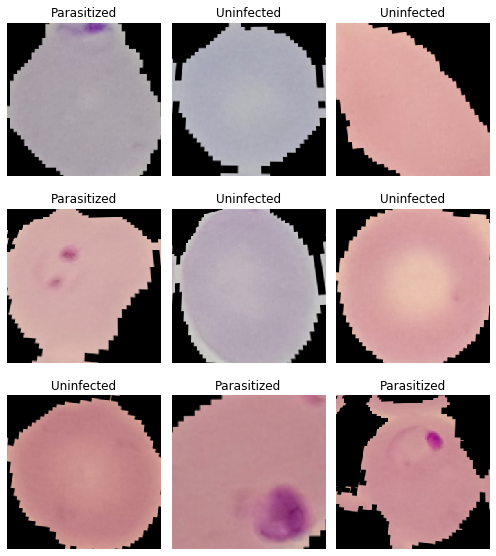

In [8]:
data.show_batch(rows=3, figsize=(7,8))

## Train Model - ResNet 34

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.270268,0.169937,0.062058,01:41
1,0.187434,0.136077,0.050082,01:40
2,0.158007,0.114820,0.043912,01:40
3,0.142859,0.111442,0.042098,01:40


In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


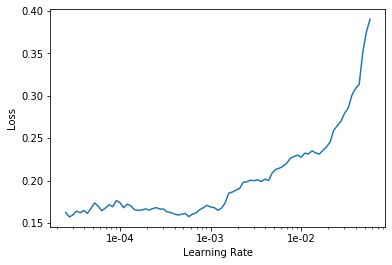

In [14]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(5e-6,5e-5 ))


epoch,train_loss,valid_loss,error_rate,time
0,0.129648,0.103622,0.040102,01:42
1,0.125577,0.095299,0.037380,01:42
2,0.106446,0.093903,0.037743,01:43
3,0.097762,0.092234,0.036110,01:43


In [16]:
learn.save('stage-2')

## Interpretations

In [17]:
learn.load('stage-2');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

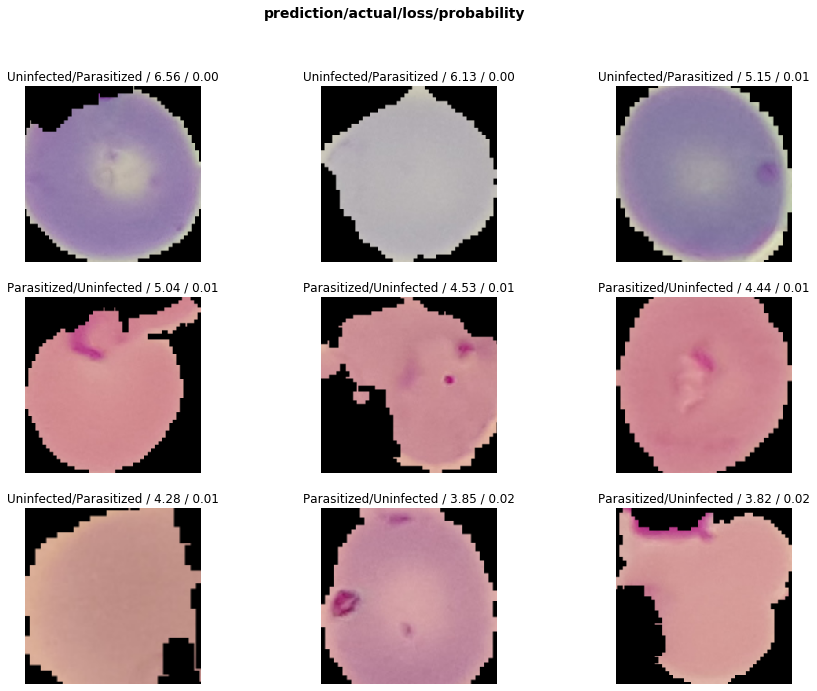

In [19]:
interp.plot_top_losses(9, figsize=(15,11))


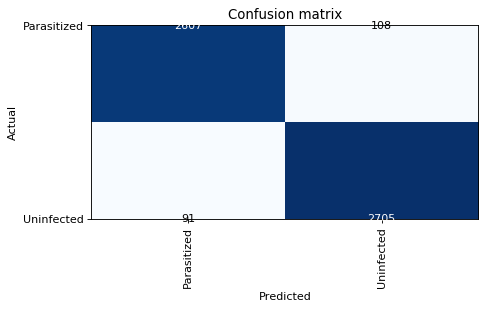

In [31]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=80)


In [32]:
interp.most_confused(min_val=2)


[('Parasitized', 'Uninfected', 108), ('Uninfected', 'Parasitized', 91)]